In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [38]:
df = pd.read_csv('geo_data_0.csv')
df1 = pd.read_csv('geo_data_1.csv')
df2 = pd.read_csv('geo_data_2.csv')

Procedere a hacer un pequeño analisis de los csv para observar que no haya errores, datos faltantes, duplicados que no van, o datos sesgados con las graficas.

,id,f0,f1,f2,product
30897,1ATbw,0.408016,-0.259856,8.602909,129.972231
1339,Ny8jD,1.568472,-0.181479,6.047243,175.503421
2329,GNskf,1.214657,-0.526583,1.358373,96.084431
98453,ZRu4O,-0.548347,0.891321,-0.234464,36.209784
25013,B374r,1.089591,0.016756,4.762040,90.537839
82174,r8AJM,-0.640848,0.918726,5.009933,66.497904
57022,aPJWt,0.440683,-0.288428,0.006294,83.448789
58612,NYXV3,-1.045213,0.325867,4.901721,130.384222
91297,0dZ47,-0.804028,0.476643,2.544826,116.651768
28418,GV9dg,-0.967819,0.277978,2.652982,152.852613


,id,f0,f1,f2,product
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
41724,bxg6G,-0.823752,0.546319,3.630479,93.007798
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
66136,74z30,1.084962,-0.312358,6.990771,127.643327
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
75715,Tdehs,0.112079,0.430296,3.218993,60.964018
90815,fiKDv,0.049883,0.841313,6.394613,137.346586
92341,TtcGQ,0.110711,1.022689,0.911381,101.318008
97785,bsk9y,0.378429,0.005837,0.160827,160.637302


,id,f0,f1,f2,product
931,HZww2,0.755284,0.368511,1.863211,30.681774
7530,HZww2,1.061194,-0.373969,10.430210,158.828695


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

(np.float64(-0.00033691297345175126), np.float64(0.0007166090877695479), np.float64(-0.0029962585634681917), np.float64(0.004816213270019428))


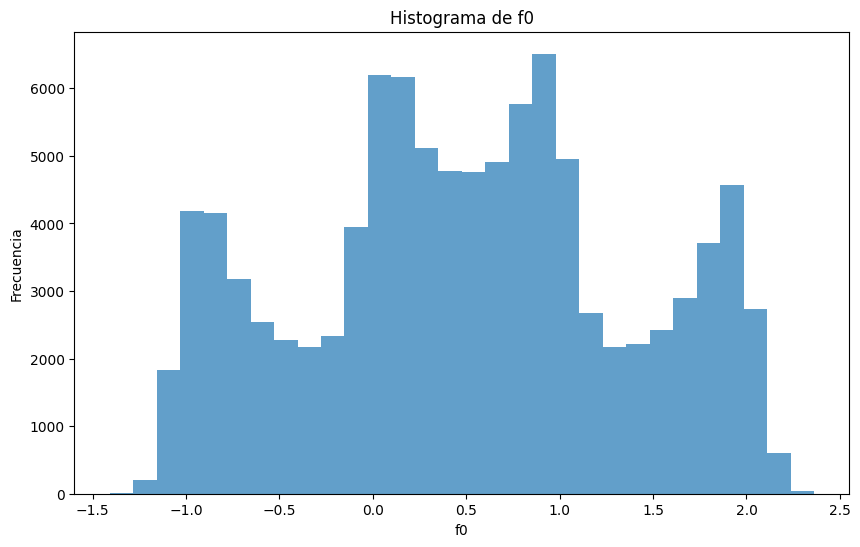

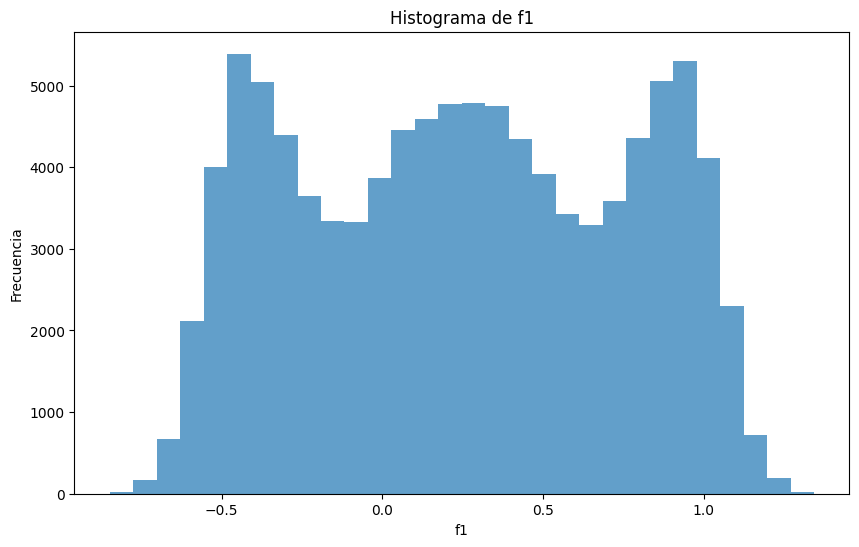

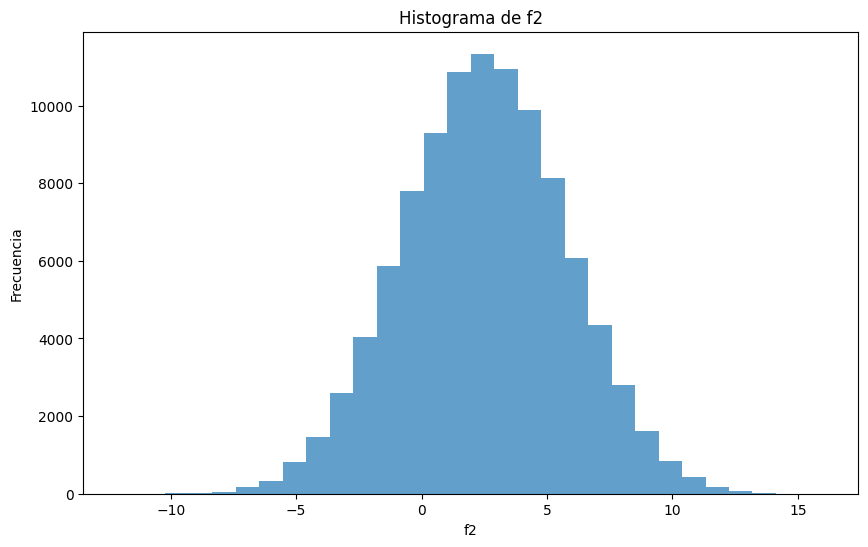

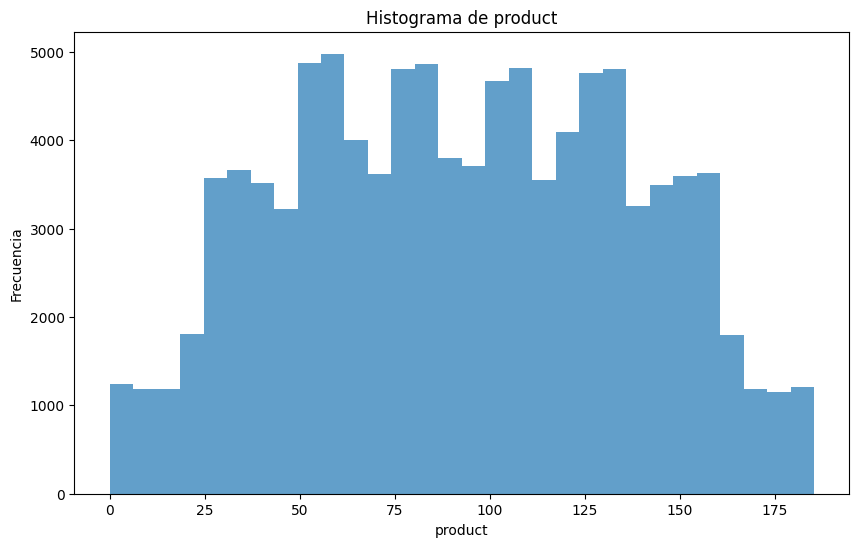

In [39]:
display(df.sample(20))
display(df[df['id'].duplicated()])
display(df[df['id'] == 'HZww2'])
display(df.info())

sesgo_f0 = df['f0'].skew()
sesgo_f1 = df['f1'].skew()
sesgo_f2 = df['f2'].skew()
sesgo_product = df['product'].skew()
print(f"{sesgo_f0, sesgo_f1, sesgo_f2, sesgo_product}")
    
for column in ['f0', 'f1', 'f2', 'product']:
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=30, alpha=0.7)
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()


,id,f0,f1,f2,product
73685,z71CF,17.092671,-6.011760,1.995408,53.906522
75973,1YJLQ,-16.634356,-3.406440,-0.006583,3.179103
20657,C7P67,2.215701,-3.504948,4.006240,110.992147
53631,meBld,13.362009,-12.796402,4.989884,134.766305
25552,pzFkR,-2.004232,-3.746518,1.994762,57.085625
22892,E1JpS,-5.219753,-7.755580,1.997709,57.085625
7636,bd9s4,18.435942,-3.787025,1.006345,26.953261
50565,Dctnr,7.479318,-3.138229,-0.001392,0.000000
26265,AWUHp,-3.431016,-0.131448,3.006542,84.038886
51740,kekdw,-1.134131,-4.377093,0.994129,30.132364


,id,f0,f1,f2,product
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044


,id,f0,f1,f2,product
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Valor maximo de producto df1: 137.94540774090564
Valor minimo de producto df1: 0.0
Valor medio de producto df1: 92.50000000000001
(np.float64(0.0019921685530585064), np.float64(0.016596790230620807), np.float64(0.006665849855549214), np.float64(0.00668471965010796))


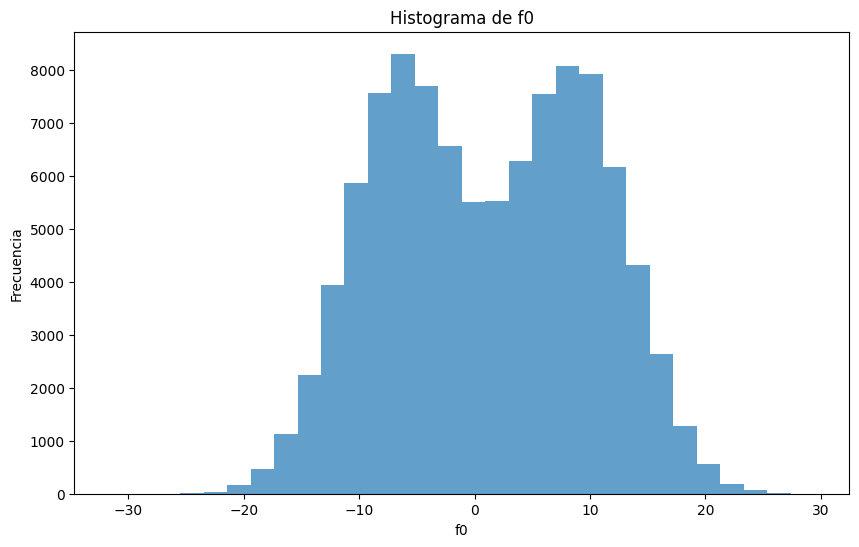

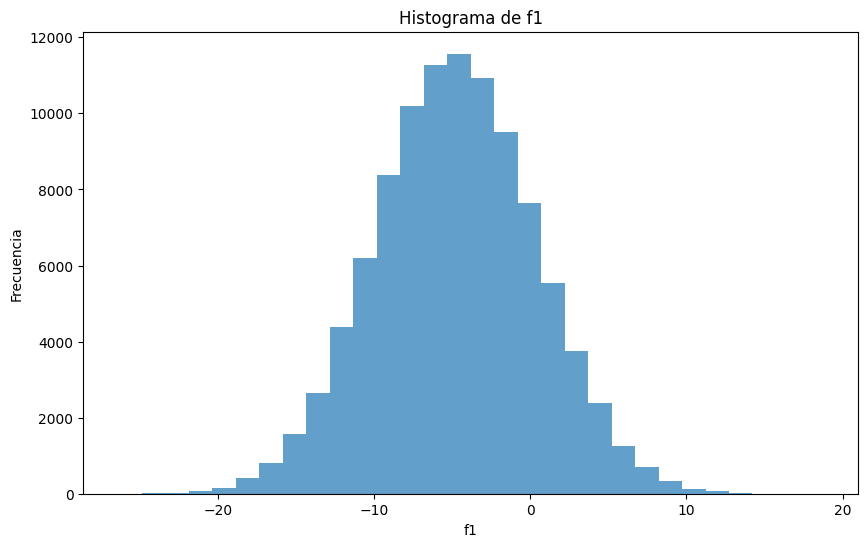

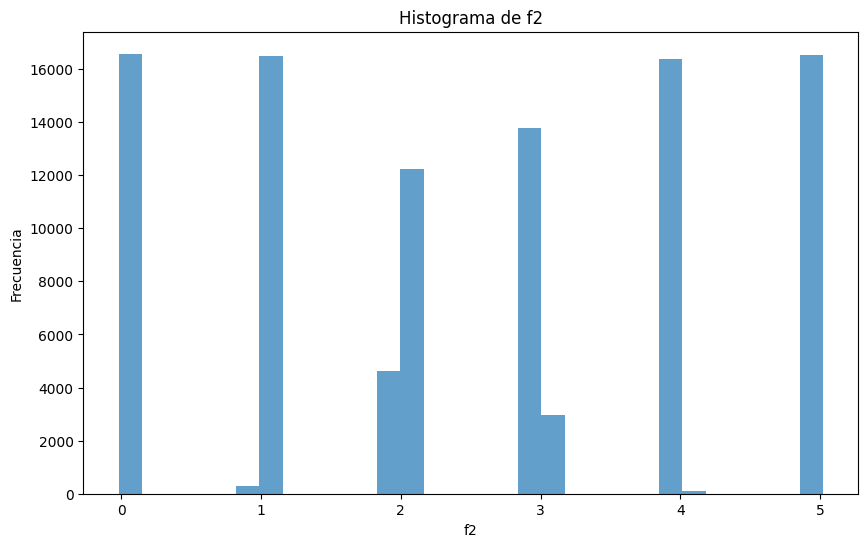

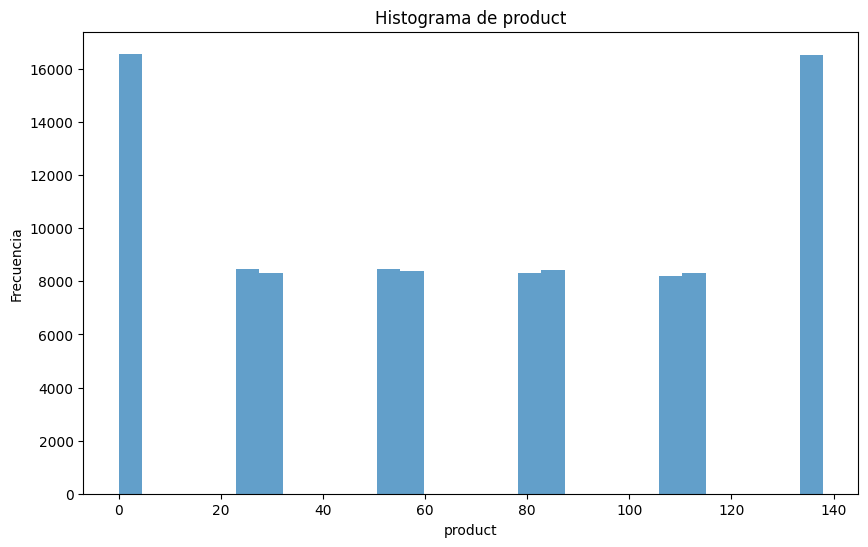

In [25]:
display(df1.sample(20))
display(df1[df1['id'].duplicated()])
display(df1[df1['id'] == 'LHZR0'])
display(df1.info())
maximo = df1['product'].max()
minimo = df1['product'].min()
mean_val = df['product'].mean()
print(f"Valor maximo de producto df1: {maximo}")
print(f"Valor minimo de producto df1: {minimo}")
print(f"Valor medio de producto df1: {mean_val}")

sesgo_f0 = df1['f0'].skew()
sesgo_f1 = df1['f1'].skew()
sesgo_f2 = df1['f2'].skew()
sesgo_product = df1['product'].skew()
print(f"{sesgo_f0, sesgo_f1, sesgo_f2, sesgo_product}")
    
for column in ['f0', 'f1', 'f2', 'product']:
    plt.figure(figsize=(10, 6))
    plt.hist(df1[column], bins=30, alpha=0.7)
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

,id,f0,f1,f2,product
89548,OcuNu,1.915400,0.610897,2.007301,51.113116
31790,83cu2,0.311607,-1.997989,2.631301,109.509427
94832,EpOQG,0.398951,0.672546,-2.794696,85.863139
34394,pace6,0.231077,0.112886,2.094893,134.090490
32951,ESE8a,-2.424389,2.913501,5.959314,137.115588
52688,ISQ3H,1.768091,1.290288,2.957779,154.298554
29405,xvGi4,-0.100417,-1.602786,1.673890,157.414498
5684,56uce,0.216074,-0.844820,-0.718315,38.774569
453,QmnOo,0.025455,3.608885,-0.442263,52.428410
80348,fguYC,-0.373203,-0.814108,5.599764,126.759746


,id,f0,f1,f2,product
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572


,id,f0,f1,f2,product
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

(np.float64(0.003941216892809773), np.float64(0.014801595572188008), np.float64(0.004057153604120561), np.float64(0.004655008741543992))


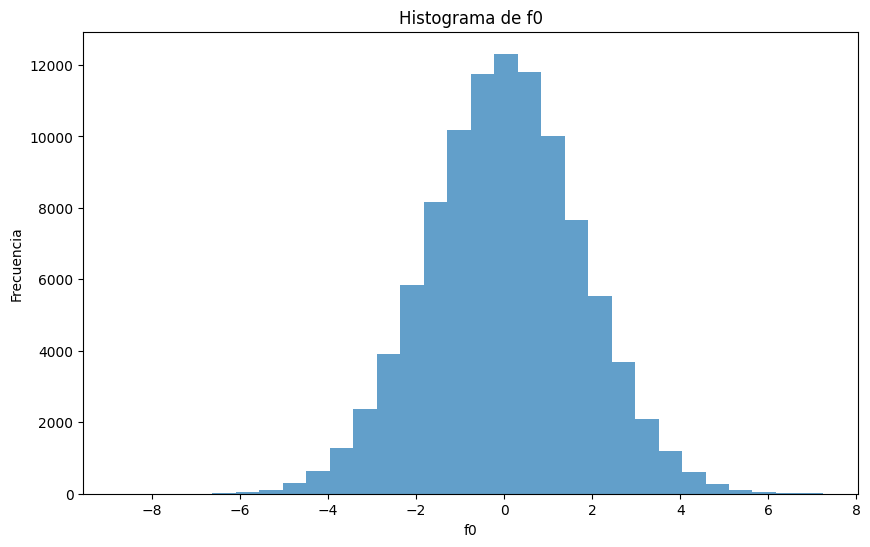

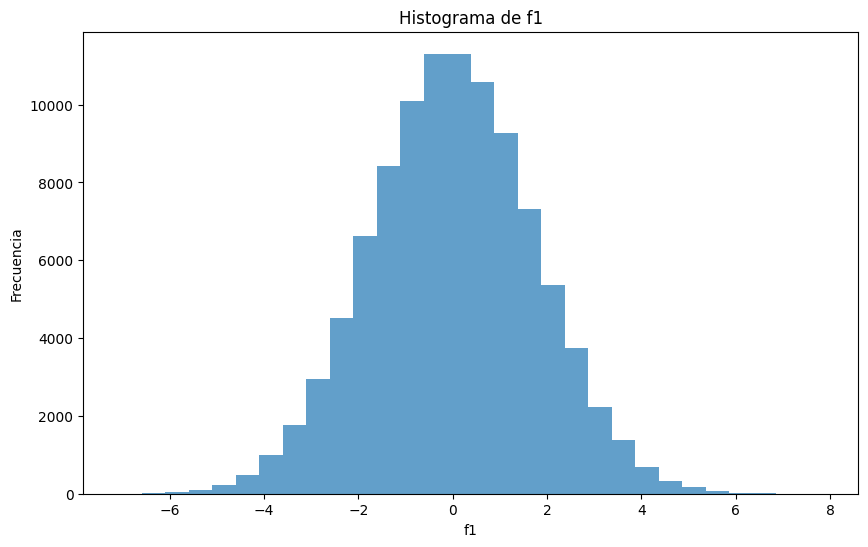

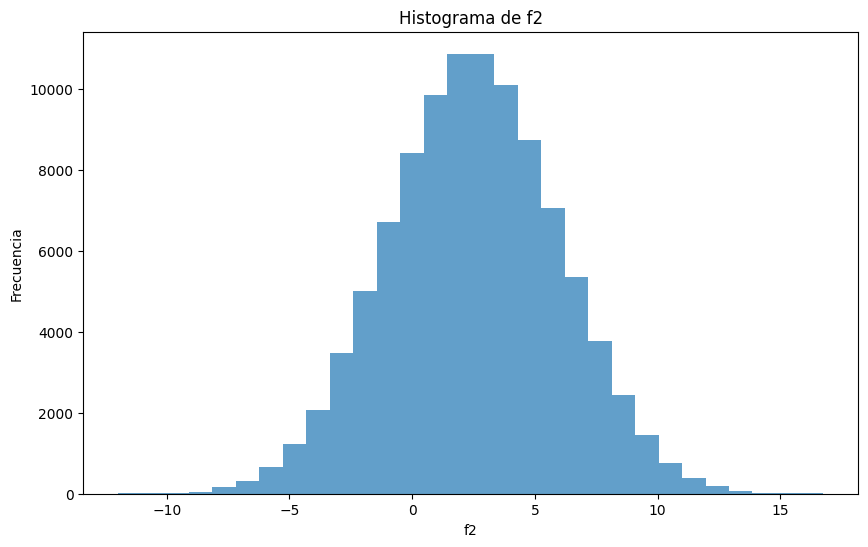

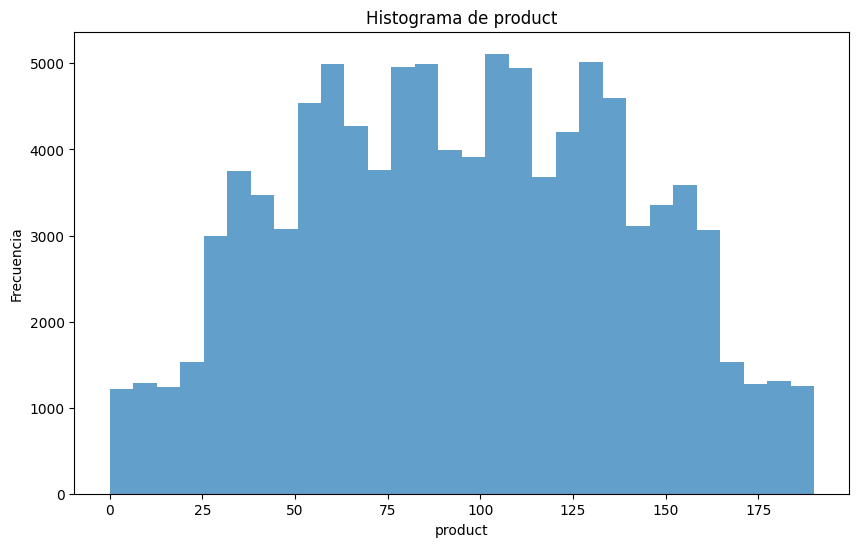

In [26]:
display(df2.sample(20))
display(df2[df2['id'].duplicated()])
display(df2[df2['id'] == 'xCHr8'])
display(df2.info())
sesgo_f0 = df2['f0'].skew()
sesgo_f1 = df2['f1'].skew()
sesgo_f2 = df2['f2'].skew()
sesgo_product = df2['product'].skew()
print(f"{sesgo_f0, sesgo_f1, sesgo_f2, sesgo_product}")
    
for column in ['f0', 'f1', 'f2', 'product']:
    plt.figure(figsize=(10, 6))
    plt.hist(df2[column], bins=30, alpha=0.7)
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

Se han examinado los 3 archivos csv y al parecer no hay ningun problema con ninguno, y los ids duplicados que hay es por la diferencia de region. Por lo tanto parecen estar listos para lo siguiente. Dividire los conjuntos en prueba y validacion en funciones, calculando el RECM y el volumen medio de reservas de cada dataset.

In [44]:
def evaluate_model(df, feature_columns, target_column, dataset_name, test_size=0.25, random_state=12345):
    # Divide los datos en características y objetivo
    features = df[feature_columns]
    target = df[target_column]
    
    # Divide los datos en conjunto de entrenamiento y validación
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=test_size, random_state=random_state
    )
    
    # Inicializa y entrena el modelo
    model = LinearRegression()
    model.fit(features_train, target_train)
    
    # Realiza predicciones
    predictions_valid = model.predict(features_valid)
    
    # Calcula la RECM
    result = mean_squared_error(target_valid, predictions_valid)**0.5
    mean_prediction = predictions_valid.mean()
    
    
    # Imprime los resultados con el identificador del conjunto
    print(f"RECM del modelo de regresión lineal en el conjunto de validación {dataset_name}:", result)
    print(f"Volumen medio de las reservas para el conjunto de validación {dataset_name}: ", mean_prediction)
    print()
    
    return result, mean_prediction

# Para df
evaluate_model(df, ['f0', 'f1', 'f2'], 'product', '1')

# Para df1
evaluate_model(df1, ['f0', 'f1', 'f2'], 'product', '2')

# Para df2
evaluate_model(df2, ['f0', 'f1', 'f2'], 'product', '3')




RECM del modelo de regresión lineal en el conjunto de validación 1: 37.5794217150813
Volumen medio de las reservas para el conjunto de validación 1:  92.59256778438035

RECM del modelo de regresión lineal en el conjunto de validación 2: 0.8930992867756165
Volumen medio de las reservas para el conjunto de validación 2:  68.72854689544602

RECM del modelo de regresión lineal en el conjunto de validación 3: 40.02970873393434
Volumen medio de las reservas para el conjunto de validación 3:  94.96504596800489



(np.float64(40.02970873393434), np.float64(94.96504596800489))

Ahora procedere a comparar la cantidad de 111.1 unidades que es lo que se necesita para evitar perdidas, con la media de cada region teniendo en cuenta que 111.1 unidades son alrededor de 500,000 dolares

In [45]:
def analyze_production(mean_prediction, region_name, threshold=111.1, investment=100_000_000, wells=200):
    # Calcular el valor promedio mínimo esperado por pozo
    min_value_per_well = investment / wells
    print(f"En la región {region_name}:")
    print(f"- Inversión total: ${investment:,}")
    print(f"- Número de pozos: {wells}")
    print(f"- Valor promedio mínimo por pozo para evitar pérdidas: ${min_value_per_well:,.2f}")
    print(f"- Unidades mínimas requeridas por pozo: {threshold:.1f}")
    
    # Comparación con el promedio de reservas
    if mean_prediction >= threshold:
        return f"El volumen medio de reservas ({mean_prediction:.1f}) en la región {region_name} es suficiente para evitar pérdidas."
    else:
        return f"El volumen medio de reservas ({mean_prediction:.1f}) en la región {region_name} es insuficiente para evitar pérdidas."

# Evaluar región 1
result1, mean_prediction1 = evaluate_model(df, ['f0', 'f1', 'f2'], 'product', "1")
print(analyze_production(mean_prediction1, "1"))

# Evaluar región 2
result2, mean_prediction2 = evaluate_model(df1, ['f0', 'f1', 'f2'], 'product', "2")
print(analyze_production(mean_prediction2, "2"))

# Evaluar región 3
result3, mean_prediction3 = evaluate_model(df2, ['f0', 'f1', 'f2'], 'product', "3")
print(analyze_production(mean_prediction3, "3"))


RECM del modelo de regresión lineal en el conjunto de validación 1: 37.5794217150813
Volumen medio de las reservas para el conjunto de validación 1:  92.59256778438035

En la región 1:
- Inversión total: $100,000,000
- Número de pozos: 200
- Valor promedio mínimo por pozo para evitar pérdidas: $500,000.00
- Unidades mínimas requeridas por pozo: 111.1
El volumen medio de reservas (92.6) en la región 1 es insuficiente para evitar pérdidas.
RECM del modelo de regresión lineal en el conjunto de validación 2: 0.8930992867756165
Volumen medio de las reservas para el conjunto de validación 2:  68.72854689544602

En la región 2:
- Inversión total: $100,000,000
- Número de pozos: 200
- Valor promedio mínimo por pozo para evitar pérdidas: $500,000.00
- Unidades mínimas requeridas por pozo: 111.1
El volumen medio de reservas (68.7) en la región 2 es insuficiente para evitar pérdidas.
RECM del modelo de regresión lineal en el conjunto de validación 3: 40.02970873393434
Volumen medio de las reserva

Factores para aumentar el beneficio:

Incrementar las reservas medias: Buscar regiones con mayor volumen de reservas para maximizar el ingreso.
Analizar nuevos datos geológicos.
Priorizar las regiones que superen el umbral de producción (111.1 unidades).
Reducir costos de inversión: Optimizar los recursos invertidos en exploración, perforación y operación.
Negociar contratos más favorables con proveedores.
Implementar tecnologías más eficientes para reducir el costo operativo.
Identificación de las mejores regiones:

La región con el mayor volumen medio de reservas será la más rentable.
Regiones con volúmenes bajos deben evaluarse con mayor detalle para decidir si son viables o si es mejor descartarlas.
Evaluar riesgos y fluctuaciones:

Precios del petróleo: Los ingresos pueden variar significativamente según el mercado.
Costos adicionales: Como mantenimiento, transporte o imprevistos operativos.

Ahora eligire los mejores 200 pozos. 

In [52]:
def top_200_with_real_and_predicted(df, feature_columns, target_column, dataset_name, n=200, test_size=0.25, random_state=12345):
    # Evaluación del modelo
    result, mean_prediction = evaluate_model(df, feature_columns, target_column, dataset_name, test_size, random_state)

    # Predicción y agregación al DataFrame original
    features = df[feature_columns]
    target = df[target_column]
    model = LinearRegression()
    model.fit(features, target)
    predictions = model.predict(features)

    # Agregar predicciones al DataFrame original
    df['predictions'] = predictions

    # Ordenar por predicciones y seleccionar los primeros 'n'
    sorted_df = df.sort_values(by='predictions', ascending=False)
    top_n = sorted_df.head(n)

    # Cálculo de la ganancia con el valor real
    top_n['ganancia'] = top_n[target_column]  # Usamos el valor real de 'product' para calcular la ganancia

    return top_n

# Usamos la función para cada dataset
top_200_region1 = top_200_with_real_and_predicted(df, ['f0', 'f1', 'f2'], 'product', '1')
top_200_region2 = top_200_with_real_and_predicted(df1, ['f0', 'f1', 'f2'], 'product', '2')
top_200_region3 = top_200_with_real_and_predicted(df2, ['f0', 'f1', 'f2'], 'product', '3')

# Mostrar resultados
print("Top 200 pozos en la Región 1 con ganancias:\n", top_200_region1)
print("\nTop 200 pozos en la Región 2 con ganancias:\n", top_200_region2)
print("\nTop 200 pozos en la Región 3 con ganancias:\n", top_200_region3)


RECM del modelo de regresión lineal en el conjunto de validación 1: 37.5794217150813
Volumen medio de las reservas para el conjunto de validación 1:  92.59256778438035

RECM del modelo de regresión lineal en el conjunto de validación 2: 0.8930992867756165
Volumen medio de las reservas para el conjunto de validación 2:  68.72854689544602

RECM del modelo de regresión lineal en el conjunto de validación 3: 40.02970873393434
Volumen medio de las reservas para el conjunto de validación 3:  94.96504596800489

Top 200 pozos en la Región 1 con ganancias:
           id        f0        f1         f2     product  predictions  \
51140  QFDWZ  1.092258 -0.541900  16.003790  182.079984   195.019630   
83095  xuWxm  1.888221  0.067384  15.428372  144.009283   185.646434   
51464  Fgte6  1.612452 -0.074593  15.230322  173.971897   185.296901   
93073  S96Jh  1.814871 -0.207268  14.087536  162.810993   180.386068   
52356  R5IYz  0.879559  0.258449  15.202838  123.920559   177.656152   
...      ... 

C:\Users\HL4ev\AppData\Local\Temp\ipykernel_14560\2179042425.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_n['ganancia'] = top_n[target_column]  # Usamos el valor real de 'product' para calcular la ganancia
C:\Users\HL4ev\AppData\Local\Temp\ipykernel_14560\2179042425.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_n['ganancia'] = top_n[target_column]  # Usamos el valor real de 'product' para calcular la ganancia
C:\Users\HL4ev\AppData\Local\Temp\ipykernel_14560\2179042425.py:20: SettingW

Ahora calculare el volumen objetivo de reservas según las predicciones y almacenar las predicciones para los 200 pozos en cada una de las 3 regiones. Mostrando graficas de los resultados.

RECM del modelo de regresión lineal en el conjunto de validación Region 1: 37.5794217150813
Volumen medio de las reservas para el conjunto de validación Region 1:  92.59256778438035

RECM del modelo de regresión lineal en el conjunto de validación Region 2: 0.8930992867756165
Volumen medio de las reservas para el conjunto de validación Region 2:  68.72854689544602

RECM del modelo de regresión lineal en el conjunto de validación Region 3: 40.02970873393434
Volumen medio de las reservas para el conjunto de validación Region 3:  94.96504596800489

Predictions (First 10 values with new lines):
                                         predictions
0  [195.01963028707934, 185.64643431356296, 185.2...
1  [140.35940182017004, 139.9824583894732, 139.90...
2  [176.82906621846064, 174.59967277232815, 174.5...

Real Values (First 10 values with new lines):
                                         real_values
0  [182.07998393845384, 144.0092829411289, 173.97...
1  [137.94540774090564, 137.945407740

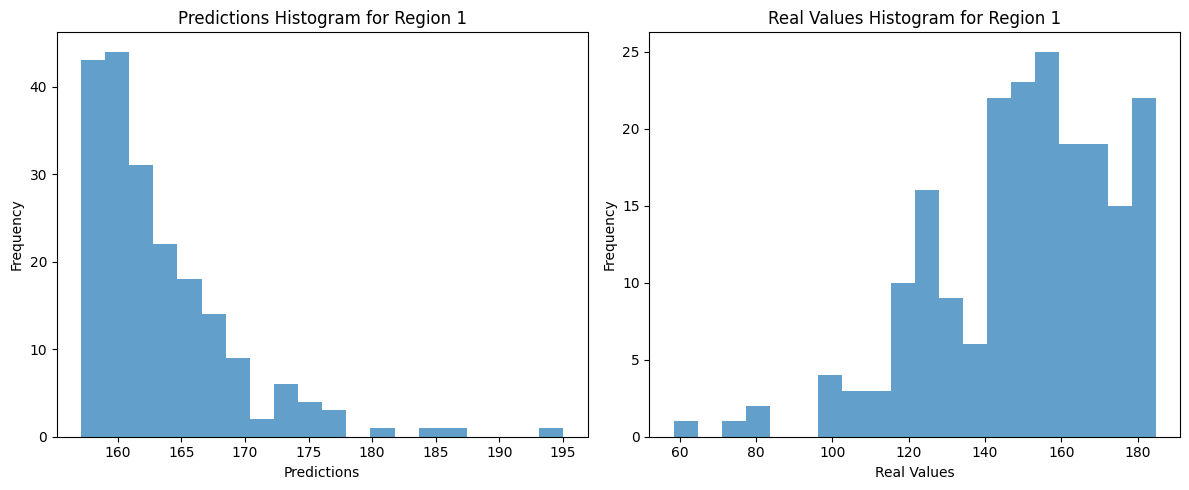

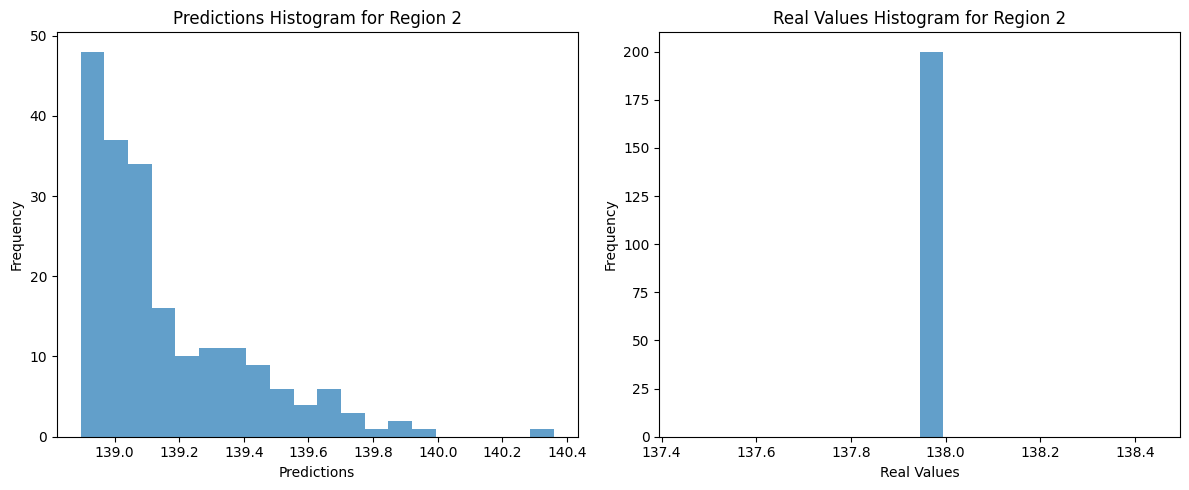

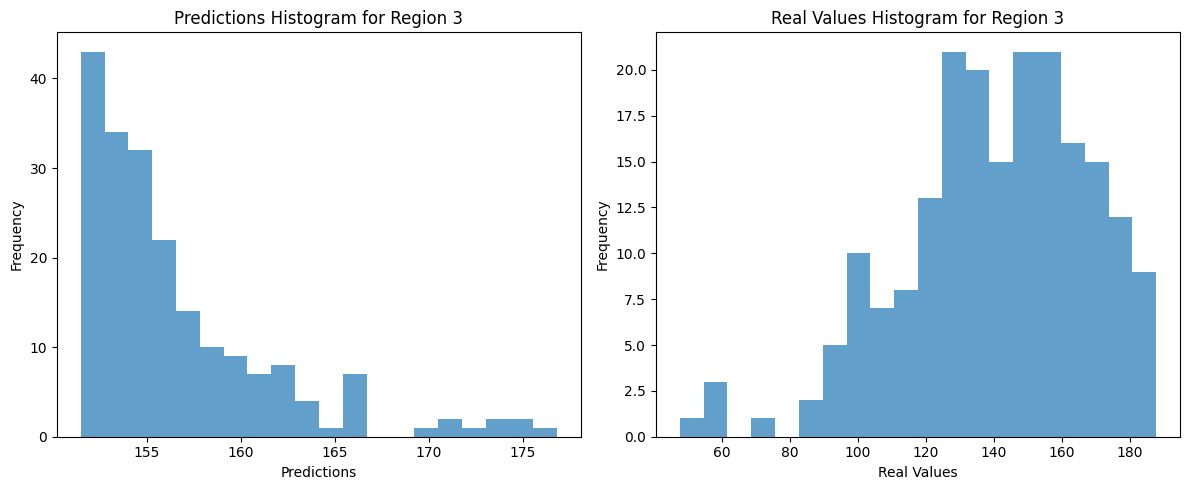

In [66]:
# Función para resumir volúmenes de reservas
def summarize_reservoir_volume(df, feature_columns, target_column, region_name, n=200, test_size=0.25, random_state=12345):
    # Evaluación del modelo
    result, mean_prediction = evaluate_model(df, feature_columns, target_column, region_name, test_size, random_state)

    # Predicción y agregación al DataFrame original
    features = df[feature_columns]
    target = df[target_column]
    model = LinearRegression()
    model.fit(features, target)
    predictions = model.predict(features)

    # Agregar predicciones al DataFrame original
    df['predictions'] = predictions

    # Ordenar por predicciones y seleccionar los primeros 'n'
    sorted_df = df.sort_values(by='predictions', ascending=False)
    top_n = sorted_df.head(n)

    # Almacenar solo los datos relevantes (predicciones y valores reales)
    top_n_summary = {
        'region': region_name,
        'predictions': top_n['predictions'].tolist(),
        'real_values': top_n[target_column].tolist(),
        'mean_prediction': top_n['predictions'].mean()
    }

    return top_n_summary

# Procesar cada DataFrame para cada región
regions = ['Region 1', 'Region 2', 'Region 3']
results = []

for region in regions:
    df_current = globals()[f'df{regions.index(region)}']  # Obtener el DataFrame según el índice
    result = summarize_reservoir_volume(df_current, ['f0', 'f1', 'f2'], 'product', region)
    results.append(result)

# Crear un DataFrame con los resultados para mejor visualización
results_df = pd.DataFrame(results)

# Mostrar las primeras 10 predicciones
print("Predictions (First 10 values with new lines):")
print(results_df[['predictions']].apply(lambda x: [f"{pred}\n" for pred in x[:10]]))

# Mostrar los primeros 10 valores reales
print("\nReal Values (First 10 values with new lines):")
print(results_df[['real_values']].apply(lambda x: [f"{val}\n" for val in x[:10]]))

# Mostrar mean_prediction
print("\nMean Prediction:")
print(results_df[['mean_prediction']])

for region in regions:
    plt.figure(figsize=(12, 5))

    # Predicciones
    plt.subplot(1, 2, 1)
    plt.hist(results_df[results_df['region'] == region]['predictions'], bins=20, alpha=0.7)
    plt.title(f'Predictions Histogram for {region}')
    plt.xlabel('Predictions')
    plt.ylabel('Frequency')

    # Valores reales
    plt.subplot(1, 2, 2)
    plt.hist(results_df[results_df['region'] == region]['real_values'], bins=20, alpha=0.7)
    plt.title(f'Real Values Histogram for {region}')
    plt.xlabel('Real Values')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

In [69]:
df.columns

Index(['id', 'f0', 'f1', 'f2', 'product', 'predictions'], dtype='object')

Ahora calculare la ganancia potencial por zona.

In [97]:
def calculate_potential_profit(df, gain_per_unit=4500, investment_cost=500000):
    top_n_region = df.head(200).copy()
    top_n_region['ganancia_neta'] = (top_n_region['predictions'] * gain_per_unit) - investment_cost
    return top_n_region[['id', 'predictions', 'ganancia_neta']]

# Procesar cada DataFrame para cada región
regions = ['Region 1', 'Region 2', 'Region 3']
region_summaries = {}
region_averages = {}
region_totals = {}

for region in regions:
    df_current = globals()[f'df{regions.index(region)}']  # Obtener el DataFrame según el índice
    region_summary = calculate_potential_profit(df_current)
    region_summaries[region] = region_summary

    region_averages[region] = region_summary['ganancia_neta'].mean()
    region_totals[region] = region_summary['ganancia_neta'].sum()

    # Evaluación del riesgo
    risk = (region_summary['ganancia_neta'] < 0).mean()
    if risk < 0.025:  # 2.5% de riesgo de pérdida
        print(f"\n{region}:")
        print(region_summary)
        print(f"\nPromedio de ganancias netas: {region_averages[region]:,.2f}")
        print(f"Total de ganancias netas: {region_totals[region]:,.2f}")
    else:
        print(f"\n{region} tiene un riesgo de pérdida mayor al 2.5%.")
        print(f"\n{region}:")
        print(region_summary)
        print(f"\nPromedio de ganancias netas: {region_averages[region]:,.2f}")
        print(f"Total de ganancias netas: {region_totals[region]:,.2f}")



Region 1 tiene un riesgo de pérdida mayor al 2.5%.

Region 1:
        id  predictions  ganancia_neta
0    txEyH    95.350600  -70922.300871
1    2acmU   116.260746   23173.358412
2    409Wp    88.707909 -100814.409506
3    iJLyR    95.194788  -71623.453985
4    Xdl7t   114.303085   14363.881702
..     ...          ...            ...
195  ePbtQ   105.406704  -25669.833466
196  4vY3L    93.021667  -81402.497082
197  J8goZ   106.655549  -20050.029405
198  gXMjq   136.140603  112632.711329
199  Nq4pu    74.130940 -166410.771267

[200 rows x 3 columns]

Promedio de ganancias netas: -76,948.54
Total de ganancias netas: -15,389,708.76

Region 2 tiene un riesgo de pérdida mayor al 2.5%.

Region 2:
        id  predictions  ganancia_neta
0    kBEdx     3.848689 -482680.897402
1    62mP7    26.591437 -380338.531611
2    vyE1P   135.665343  110494.042176
3    KcrkZ   138.541257  123435.657557
4    AHL4O   134.866171  106897.768287
..     ...          ...            ...
195  CtomV    81.187418 -13

Mi propuesta de desarrollo es complicada ya que todas las zonas o regiones tienen ganancias negativas, tanto en promedio como en total, pero si fuera a elegir una de las 3, seria definitivamente la Region 3.


df:
Mean of gains: 14343.84
Standard deviation of gains: 5018.87
95% Confidence Interval: [ 4364.08631004 24491.40177957]
Risk of Loss (%): 0.30%


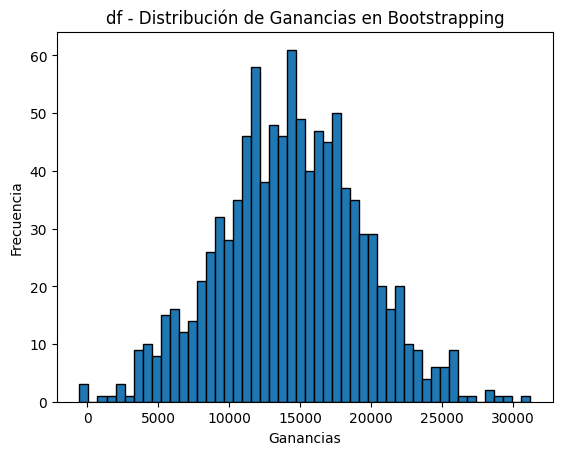


df1:
Mean of gains: 22595.19
Standard deviation of gains: 10150.27
95% Confidence Interval: [ 2784.56374132 41147.68336636]
Risk of Loss (%): 1.00%


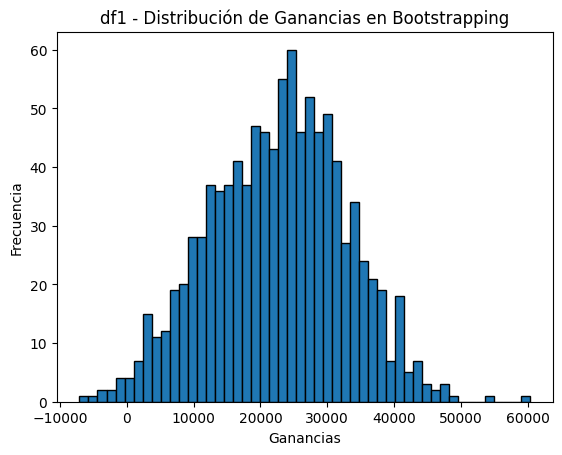


df2:
Mean of gains: 14260.60
Standard deviation of gains: 4831.00
95% Confidence Interval: [ 4654.41872543 24103.74039728]
Risk of Loss (%): 0.20%


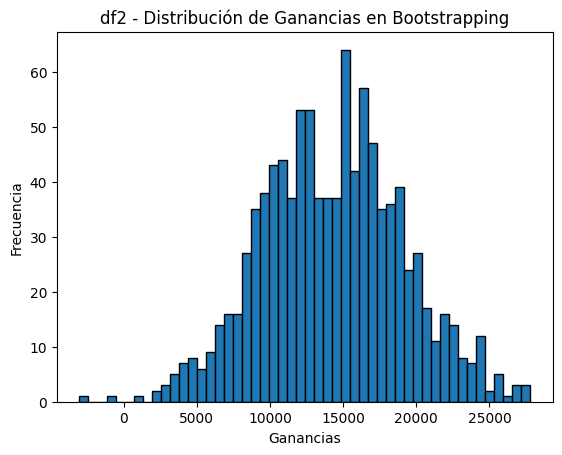

In [96]:
def bootstrap_gains(df, n_iterations=1000, sample_size=500, gain_per_unit=4500, investment_cost=500000):
    bootstrap_means = []

    for _ in range(n_iterations):
        # Seleccionar una muestra bootstrap de 500 registros
        sample = df.sample(n=sample_size, replace=True)
        
        # Calcular la ganancia para la muestra
        sample['ganancia_neta'] = (sample['predictions'] * gain_per_unit) - investment_cost
        top_gains = sample.nlargest(200, 'ganancia_neta')  # Seleccionar el top 200 según predicción
        bootstrap_means.append(top_gains['ganancia_neta'].mean())

    return bootstrap_means

# Procesamiento para cada DataFrame
n_iterations = 1000
dataframes = {'df': df, 'df1': df1, 'df2': df2}
results = {}

for name, df in dataframes.items():
    bootstrap_gains_list = bootstrap_gains(df, n_iterations)
    results[name] = {
        'mean_gains': np.mean(bootstrap_gains_list),
        'std_gains': np.std(bootstrap_gains_list),
        'ci_95': np.percentile(bootstrap_gains_list, [2.5, 97.5]),  # Intervalo de confianza del 95%
        'risk_of_loss': (np.array(bootstrap_gains_list) < 0).mean()  # Riesgo de pérdidas
    }

    # Mostrar resultados individuales para cada DataFrame
    print(f"\n{name}:")
    print(f"Mean of gains: {results[name]['mean_gains']:.2f}")
    print(f"Standard deviation of gains: {results[name]['std_gains']:.2f}")
    print(f"95% Confidence Interval: {results[name]['ci_95']}")
    print(f"Risk of Loss (%): {results[name]['risk_of_loss'] * 100:.2f}%")

    # Visualización de la distribución de ganancias
    plt.hist(bootstrap_gains_list, bins=50, edgecolor='black')
    plt.title(f'{name} - Distribución de Ganancias en Bootstrapping')
    plt.xlabel('Ganancias')
    plt.ylabel('Frecuencia')
    plt.show()


Conclusión del Análisis
Al analizar las tres regiones según sus métricas de ganancias y riesgo de pérdida, se observa que la Región 3 destaca como la opción más prometedora:

Promedio de Ganancias: La Región 3 muestra el menor promedio de pérdidas netas con -74,484.89, lo que indica una menor pérdida en comparación con las otras regiones.

Riesgo de Pérdida: La Región 3 tiene un riesgo de pérdida del 0.20%, significativamente menor que el 2.5% en las Regiones 1 y 2. Esto sugiere una estabilidad financiera más alta en términos de evitar pérdidas.

Desviación Estándar: Además, la Región 3 presenta una desviación estándar de 4831.00, la más baja de las tres regiones, lo que indica una menor variabilidad en las ganancias.

En comparación, las Regiones 1 y 2 tienen un riesgo de pérdida más alto (2.5%) y mayores pérdidas promedio netas, lo que las hace menos favorables en términos de viabilidad financiera a largo plazo.

Propuesta para el Desarrollo de Pozos Petrolíferos: Basado en los resultados, propongo la Región 3 para el desarrollo de pozos petrolíferos. Esta elección se justifica por su menor riesgo de pérdida, menor volatilidad en las ganancias y un promedio de ganancias que sigue siendo competitivo en comparación con las demás regiones.

Coincidencia con la Elección Anterior (Punto 4.3): En la elección previa, se había recomendado la Región 3 basándose en métricas similares. La consistencia en los resultados refuerza su viabilidad como la mejor opción para el desarrollo de pozos petrolíferos, destacándose como la región con menor riesgo y mayor estabilidad financiera.